# MNIST

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

## MNIST Data Set

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


### Visualization

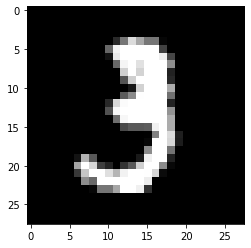

In [ ]:
import matplotlib.pyplot as plt

digit = X_train[10]
plt.imshow(digit, cmap='gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth=150)

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

## Data Preprocessing

### Reshape and Normalization
- reshape : (60000, 28, 28) to (60000, 784)
  - DNN은 1차원 데이터만 input으로 받기 때문

In [ ]:
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

- Normalization : Min-max scaler
  - 0~255값이므로 /255만 해줘도 됨

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[10])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

### One-Hot Encoding
- categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Keras Modeling

### Model Define

In [ ]:
from tensorflow.keras import models, layers

mnist = models.Sequential()

# Hidden Layers
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
mnist.add(layers.Dense(256, activation='relu'))

# Output Layer : 10개의 categories 분류
mnist.add(layers.Dense(10, activation='softmax'))

In [ ]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### Model Compile

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Model Fit

In [ ]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 4ms/step - loss: 0.2538 - accuracy: 0.9221 - val_loss: 0.1346 - val_accuracy: 0.9593
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9711 - val_loss: 0.1047 - val_accuracy: 0.9686
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0922 - val_accuracy: 0.9742
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0803 - val_accuracy: 0.9778
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.1060 - val_accuracy: 0.9730
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.1010 - val_accuracy: 0.9792
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.1105 - val_accuracy: 0.9768

## Visualization
- Overfitting

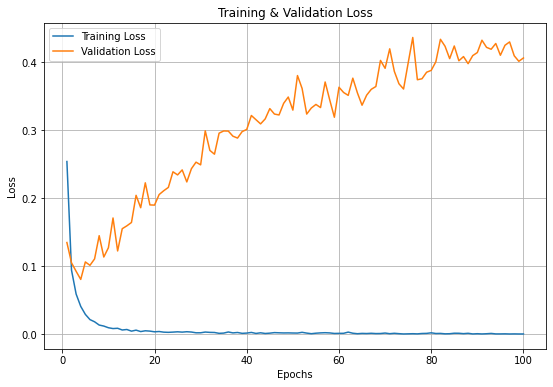

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

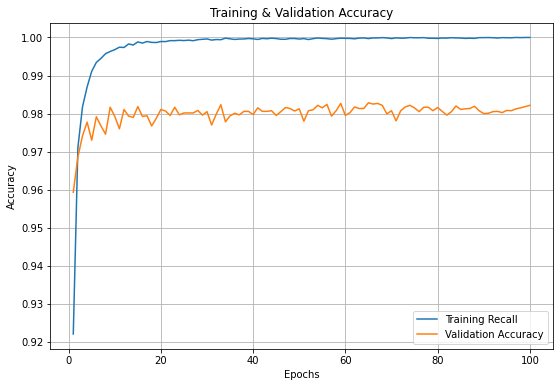

In [ ]:
epochs = range(1, len(Hist_mnist.history['accuracy'])+1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['accuracy'])
plt.plot(epochs, Hist_mnist.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Recall', 'Validation Accuracy'])
plt.grid()
plt.show()

### Model Evaluate

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.9822
Loss : 0.32649
Accuracy : 0.98220


### Model Predict

In [ ]:
np.set_printoptions(suppress=True, precision=9)

# Probability
print(mnist.predict(X_test[:1, :]))
# Class
print(mnist.predict_classes(X_test[:1, :]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[7]


## Overfitting Issues
1. 더 많은 Train Data
2. Model Capacity 낮추기
  - 너무 많은 parameters가 문제
    - Input Size : 줄일 수 있으나 웬만하면 건들지 않기
    - Output Layer : 줄일 수 없음
    - Hidden Layer : 줄이면 Overfitting도 줄일 수 있으나 성능에 부정적인 영향
  - L2 Regularization
    - 마찬가지로 Overfitting은 줄일 수 있으나 성능에 부정적인 영향 (loss가 0이 되지 않음)
  - Dropout
    - 학습 과정에서 일부 연결을 무작위로 제외 시킴
  - Batch Normalization
    - 활성화 함수(ReLU 등)에 값을 넣기 전에 표준화 진행
    - Loss가 증가하지 않으면서 overfitting도 줄임

## Model Capacity

### 1. Layer 줄이기

In [25]:
from tensorflow.keras import models, layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2837 - accuracy: 0.9173 - val_loss: 0.1420 - val_accuracy: 0.9616
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9655 - val_loss: 0.0994 - val_accuracy: 0.9708
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.9774 - val_loss: 0.0875 - val_accuracy: 0.9737
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0550 - accuracy: 0.9835 - val_loss: 0.0920 - val_accuracy: 0.9752
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 0.0810 - val_accuracy: 0.9754
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9910 - val_loss: 0.0826 - val_accuracy: 0.9772
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9932 - val_loss: 0.0838 - val_accuracy: 0.9780

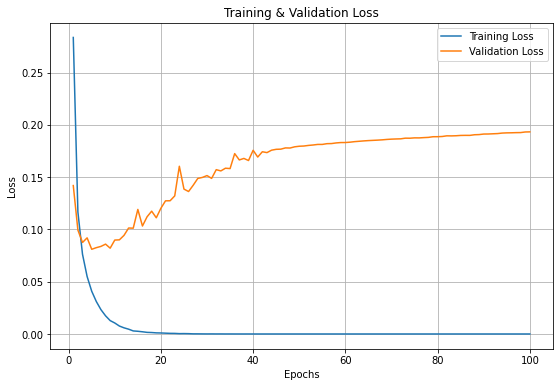

In [27]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [28]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1593 - accuracy: 0.9826
Loss : 0.15929
Accuracy : 0.98260


### 2. L2 Regularizaiton

In [29]:
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,),
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2680 - accuracy: 0.9219 - val_loss: 0.1352 - val_accuracy: 0.9617
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1054 - accuracy: 0.9710 - val_loss: 0.1033 - val_accuracy: 0.9730
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0715 - accuracy: 0.9811 - val_loss: 0.0914 - val_accuracy: 0.9753
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0545 - accuracy: 0.9860 - val_loss: 0.1014 - val_accuracy: 0.9757
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 0.9891 - val_loss: 0.0937 - val_accuracy: 0.9783
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0376 - accuracy: 0.9914 - val_loss: 0.1047 - val_accuracy: 0.9770
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0346 - accuracy: 0.9922 - val_loss: 0.1177 - val_accuracy: 0.9750

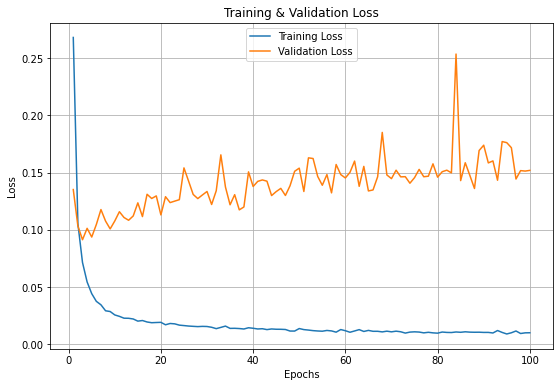

In [31]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [32]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1321 - accuracy: 0.9795
Loss : 0.13205
Accuracy : 0.97950


### 3. Drop Out

In [33]:
from tensorflow.keras import models, layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
mnist.add(layers.Dropout(0.4)) # dropout할 연결의 비율
mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3234 - accuracy: 0.9015 - val_loss: 0.1313 - val_accuracy: 0.9611
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1503 - accuracy: 0.9549 - val_loss: 0.0982 - val_accuracy: 0.9695
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1116 - accuracy: 0.9662 - val_loss: 0.1021 - val_accuracy: 0.9714
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0927 - accuracy: 0.9721 - val_loss: 0.0996 - val_accuracy: 0.9733
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0822 - accuracy: 0.9751 - val_loss: 0.0881 - val_accuracy: 0.9767
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0715 - accuracy: 0.9787 - val_loss: 0.0904 - val_accuracy: 0.9772
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0653 - accuracy: 0.9805 - val_loss: 0.0900 - val_accuracy: 0.9778

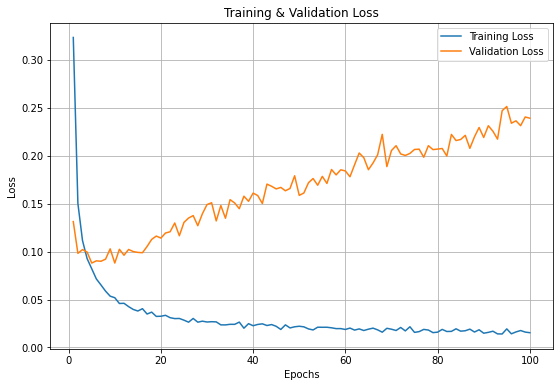

In [35]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [36]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2145 - accuracy: 0.9820
Loss : 0.21450
Accuracy : 0.98200


### 4. Batch Normalization

In [37]:
from tensorflow.keras import models, layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.1814 - accuracy: 0.9457 - val_loss: 0.1021 - val_accuracy: 0.9704
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9774 - val_loss: 0.0989 - val_accuracy: 0.9702
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9864 - val_loss: 0.0915 - val_accuracy: 0.9748
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0875 - val_accuracy: 0.9764
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0846 - val_accuracy: 0.9787
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0973 - val_accuracy: 0.9765
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0841 - val_accuracy: 0.9787

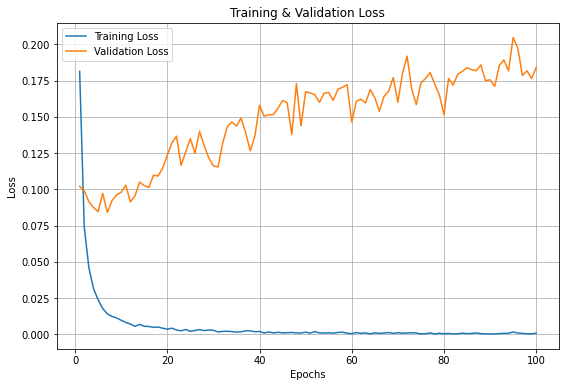

In [39]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [40]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1599 - accuracy: 0.9814
Loss : 0.15993
Accuracy : 0.98140


### 5. L2 + Dropout

In [41]:
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,),
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3288 - accuracy: 0.9022 - val_loss: 0.1408 - val_accuracy: 0.9604
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1514 - accuracy: 0.9562 - val_loss: 0.1154 - val_accuracy: 0.9698
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.9664 - val_loss: 0.1045 - val_accuracy: 0.9723
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1041 - accuracy: 0.9718 - val_loss: 0.1070 - val_accuracy: 0.9737
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0916 - accuracy: 0.9755 - val_loss: 0.1038 - val_accuracy: 0.9742
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0856 - accuracy: 0.9779 - val_loss: 0.0925 - val_accuracy: 0.9786
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9791 - val_loss: 0.0960 - val_accuracy: 0.9776

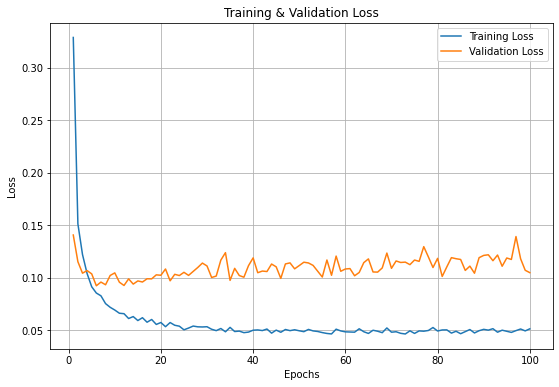

In [43]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [44]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9846
Loss : 0.09672
Accuracy : 0.98460


### 6. L2 + Batch Normalization

In [47]:
from tensorflow.keras import models, layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28*28,),
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256,
          kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [48]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.1915 - accuracy: 0.9454 - val_loss: 0.1292 - val_accuracy: 0.9629
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0819 - accuracy: 0.9780 - val_loss: 0.1038 - val_accuracy: 0.9729
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0571 - accuracy: 0.9852 - val_loss: 0.0973 - val_accuracy: 0.9750
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0451 - accuracy: 0.9889 - val_loss: 0.1063 - val_accuracy: 0.9732
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0350 - accuracy: 0.9924 - val_loss: 0.1133 - val_accuracy: 0.9747
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0319 - accuracy: 0.9932 - val_loss: 0.1021 - val_accuracy: 0.9773
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0291 - accuracy: 0.9943 - val_loss: 0.1092 - val_accuracy: 0.9771

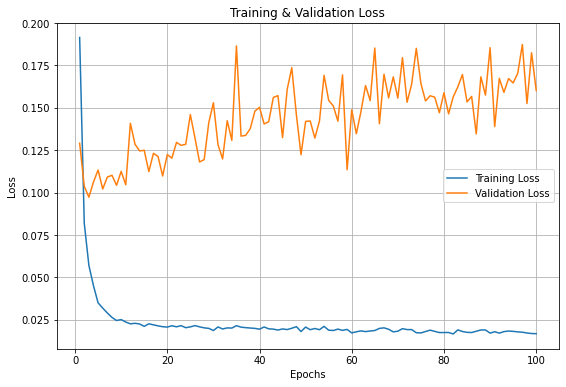

In [49]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [50]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1597 - accuracy: 0.9802
Loss : 0.15973
Accuracy : 0.98020


### 7. Dropout + Batch Normalization

In [51]:
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28*28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [52]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.2839 - accuracy: 0.9158 - val_loss: 0.1288 - val_accuracy: 0.9592
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1435 - accuracy: 0.9561 - val_loss: 0.1052 - val_accuracy: 0.9676
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1129 - accuracy: 0.9654 - val_loss: 0.1018 - val_accuracy: 0.9712
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0977 - accuracy: 0.9693 - val_loss: 0.0931 - val_accuracy: 0.9736
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0844 - accuracy: 0.9741 - val_loss: 0.0935 - val_accuracy: 0.9737
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0757 - accuracy: 0.9763 - val_loss: 0.0824 - val_accuracy: 0.9762
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.0964 - val_accuracy: 0.9730

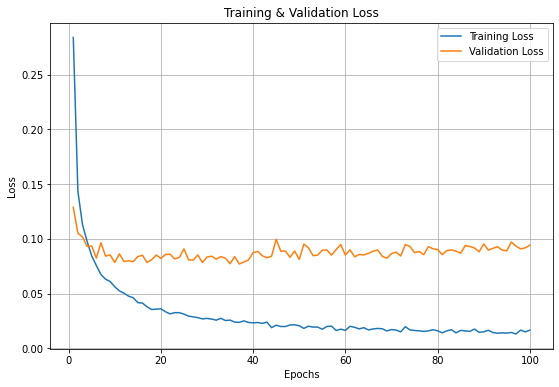

In [53]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [54]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9814
Loss : 0.08306
Accuracy : 0.98140


## 정리
|                     | train_loss | validation_loss | eval_loss | eval_accuracy |
|---------------------|:----------:|:---------------:|:---------:|:-------------:|
| Original            | 2.0563e-09 |      0.4062     |  0.32649  |    0.98220    |
| Remove Layer        | 5.4985e-09 |      0.1934     |  0.15929  |    0.98260    |
| L2 Regularization   |   0.0102   |      0.1519     |  0.13205  |    0.97950    |
| Drop Out            |   0.0154   |      0.2392     |  0.21450  |    0.98200    |
| Batch Normalization | 8.9677e-04 |      0.1840     |  0.15993  |    0.98140    |
| L2 + Drop Out       |   0.0516   |      0.1050     |  0.09672  |    **0.98460**    |
| L2 + Batch          |   0.0168   |      0.1602     |  0.15973  |    0.98020    |
| Drop Out + Batch    |   0.0166   |      **0.0942**     |  **0.08306**  |    0.98140    |